# 1. Import Library

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_CONTOURS
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_TESSELATION
from mediapipe.python.solutions.hands import HandLandmark
from mediapipe.python.solutions.hands_connections import HAND_CONNECTIONS
from mediapipe.python.solutions.pose import PoseLandmark
from mediapipe.python.solutions.pose_connections import POSE_CONNECTIONS

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.left_hand_landmarks.landmark)

21

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

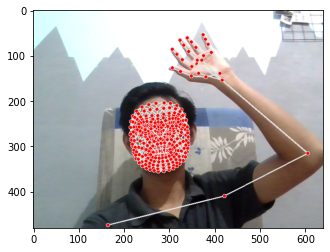

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
len(pose)

33

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)[:10]

In [17]:
result_test

array([ 0.43958154,  0.59153706, -0.93128186,  0.99977291,  0.46515259,
        0.53364152, -0.84264529,  0.99937493,  0.48044157,  0.53217304])

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.43958154,  0.59153706, -0.93128186,  0.99977291,  0.46515259,
        0.53364152, -0.84264529,  0.99937493,  0.48044157,  0.53217304])

# 4. Setup Folders for Collection

In [20]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [21]:
# htlo
## 0
## 1
## 2
## 29
## thanks
## I love you

In [22]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [23]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [24]:
cap.release()
cv2.destroyAllWindows()

# 6. Pre-processing Data and Create Labels and Features

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [59]:
label_map = {label:num for num, label in enumerate(actions)}

In [60]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [61]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [62]:
np.array(sequences).shape

(90, 30, 1662)

In [63]:
np.array(labels).shape

(90,)

In [64]:
X = np.array(sequences)

In [65]:
X.shape

(90, 30, 1662)

In [66]:
y = to_categorical(labels).astype(int)

In [67]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [69]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [71]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [93]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [73]:
res = [0.9, 0.1, 1]

In [74]:
actions[np.argmax(res)]

'iloveyou'

In [94]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [76]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
3/3 [==============================] - 6s 161ms/step - loss: 1.9095 - categorical_accuracy: 0.2824
Epoch 2/1000
3/3 [==============================] - 0s 152ms/step - loss: 17.1931 - categorical_accuracy: 0.2706
Epoch 3/1000
3/3 [==============================] - 0s 140ms/step - loss: 22.4490 - categorical_accuracy: 0.2471
Epoch 4/1000
3/3 [==============================] - 0s 141ms/step - loss: 23.8663 - categorical_accuracy: 0.2941
Epoch 5/1000
3/3 [==============================] - 0s 146ms/step - loss: 39.2259 - categorical_accuracy: 0.3294
Epoch 6/1000
3/3 [==============================] - 0s 142ms/step - loss: 44.1223 - categorical_accuracy: 0.3059
Epoch 7/1000
3/3 [==============================] - 0s 141ms/step - loss: 12.0383 - categorical_accuracy: 0.3412
Epoch 8/1000
3/3 [==============================] - 0s 144ms/step - loss: 29.2437 - categorical_accuracy: 0.3176
Epoch 9/1000
3/3 [==============================] - 0s 144ms/step - loss: 31.2472 - categorical_a

3/3 [==============================] - 0s 119ms/step - loss: 1.9253 - categorical_accuracy: 0.5882
Epoch 74/1000
3/3 [==============================] - 0s 126ms/step - loss: 1.3844 - categorical_accuracy: 0.5647
Epoch 75/1000
3/3 [==============================] - 0s 115ms/step - loss: 2.6476 - categorical_accuracy: 0.6000
Epoch 76/1000
3/3 [==============================] - 0s 121ms/step - loss: 3.2627 - categorical_accuracy: 0.5765
Epoch 77/1000
3/3 [==============================] - 0s 117ms/step - loss: 1.9159 - categorical_accuracy: 0.6471
Epoch 78/1000
3/3 [==============================] - 0s 116ms/step - loss: 1.8537 - categorical_accuracy: 0.6118
Epoch 79/1000
3/3 [==============================] - 0s 127ms/step - loss: 2.2035 - categorical_accuracy: 0.5176
Epoch 80/1000
3/3 [==============================] - 0s 118ms/step - loss: 2.4256 - categorical_accuracy: 0.5059
Epoch 81/1000
3/3 [==============================] - 0s 116ms/step - loss: 2.0747 - categorical_accuracy: 0.56

3/3 [==============================] - 0s 120ms/step - loss: 0.7450 - categorical_accuracy: 0.7529
Epoch 146/1000
3/3 [==============================] - 0s 119ms/step - loss: 0.6985 - categorical_accuracy: 0.7176
Epoch 147/1000
3/3 [==============================] - 0s 123ms/step - loss: 0.5102 - categorical_accuracy: 0.7647
Epoch 148/1000
3/3 [==============================] - 0s 124ms/step - loss: 0.8815 - categorical_accuracy: 0.6588
Epoch 149/1000
3/3 [==============================] - 0s 121ms/step - loss: 0.9448 - categorical_accuracy: 0.7059
Epoch 150/1000
3/3 [==============================] - 0s 121ms/step - loss: 0.9149 - categorical_accuracy: 0.6588
Epoch 151/1000
3/3 [==============================] - 0s 117ms/step - loss: 0.5683 - categorical_accuracy: 0.7882
Epoch 152/1000
3/3 [==============================] - 0s 115ms/step - loss: 0.7864 - categorical_accuracy: 0.6235
Epoch 153/1000
3/3 [==============================] - 0s 126ms/step - loss: 0.8053 - categorical_accura

Epoch 217/1000
3/3 [==============================] - 0s 116ms/step - loss: 0.6637 - categorical_accuracy: 0.7765
Epoch 218/1000
3/3 [==============================] - 0s 116ms/step - loss: 0.6580 - categorical_accuracy: 0.7412
Epoch 219/1000
3/3 [==============================] - 0s 121ms/step - loss: 0.7970 - categorical_accuracy: 0.6588
Epoch 220/1000
3/3 [==============================] - 0s 118ms/step - loss: 0.7006 - categorical_accuracy: 0.7882
Epoch 221/1000
3/3 [==============================] - 0s 122ms/step - loss: 0.6548 - categorical_accuracy: 0.7412
Epoch 222/1000
3/3 [==============================] - 0s 120ms/step - loss: 0.5954 - categorical_accuracy: 0.8118
Epoch 223/1000
3/3 [==============================] - 0s 117ms/step - loss: 1.2768 - categorical_accuracy: 0.6235
Epoch 224/1000
3/3 [==============================] - 0s 122ms/step - loss: 1.3463 - categorical_accuracy: 0.5882
Epoch 225/1000
3/3 [==============================] - 0s 121ms/step - loss: 1.2871 - cat

3/3 [==============================] - 0s 125ms/step - loss: 0.5303 - categorical_accuracy: 0.7294
Epoch 289/1000
3/3 [==============================] - 0s 124ms/step - loss: 0.6320 - categorical_accuracy: 0.7529
Epoch 290/1000
3/3 [==============================] - 0s 128ms/step - loss: 0.7397 - categorical_accuracy: 0.6706
Epoch 291/1000
3/3 [==============================] - 0s 123ms/step - loss: 0.4723 - categorical_accuracy: 0.8471
Epoch 292/1000
3/3 [==============================] - 0s 120ms/step - loss: 0.3976 - categorical_accuracy: 0.8235
Epoch 293/1000
3/3 [==============================] - 0s 118ms/step - loss: 0.7527 - categorical_accuracy: 0.6941
Epoch 294/1000
3/3 [==============================] - 0s 119ms/step - loss: 0.4881 - categorical_accuracy: 0.7882
Epoch 295/1000
3/3 [==============================] - 0s 124ms/step - loss: 0.3174 - categorical_accuracy: 0.8706
Epoch 296/1000
3/3 [==============================] - 0s 123ms/step - loss: 0.3536 - categorical_accura

Epoch 360/1000
3/3 [==============================] - 0s 119ms/step - loss: 0.5713 - categorical_accuracy: 0.7765
Epoch 361/1000
3/3 [==============================] - 0s 119ms/step - loss: 0.7222 - categorical_accuracy: 0.7059
Epoch 362/1000
3/3 [==============================] - 0s 124ms/step - loss: 1.2956 - categorical_accuracy: 0.5647
Epoch 363/1000
3/3 [==============================] - 0s 124ms/step - loss: 0.8438 - categorical_accuracy: 0.7176
Epoch 364/1000
3/3 [==============================] - 0s 120ms/step - loss: 1.0301 - categorical_accuracy: 0.7647
Epoch 365/1000
3/3 [==============================] - 0s 123ms/step - loss: 1.8179 - categorical_accuracy: 0.5176
Epoch 366/1000
3/3 [==============================] - 0s 122ms/step - loss: 1.9249 - categorical_accuracy: 0.4706
Epoch 367/1000
3/3 [==============================] - 0s 122ms/step - loss: 0.9141 - categorical_accuracy: 0.6588
Epoch 368/1000
3/3 [==============================] - 0s 122ms/step - loss: 0.9367 - cat

3/3 [==============================] - 0s 129ms/step - loss: 1.2366 - categorical_accuracy: 0.6588
Epoch 432/1000
3/3 [==============================] - 0s 131ms/step - loss: 0.6722 - categorical_accuracy: 0.7176
Epoch 433/1000
3/3 [==============================] - 0s 125ms/step - loss: 0.6406 - categorical_accuracy: 0.6941
Epoch 434/1000
3/3 [==============================] - 0s 124ms/step - loss: 0.4672 - categorical_accuracy: 0.7882
Epoch 435/1000
3/3 [==============================] - 0s 122ms/step - loss: 0.5308 - categorical_accuracy: 0.7294
Epoch 436/1000
3/3 [==============================] - 0s 119ms/step - loss: 0.6024 - categorical_accuracy: 0.7176
Epoch 437/1000
3/3 [==============================] - 0s 127ms/step - loss: 0.5928 - categorical_accuracy: 0.7176
Epoch 438/1000
3/3 [==============================] - 0s 121ms/step - loss: 0.7504 - categorical_accuracy: 0.6824
Epoch 439/1000
3/3 [==============================] - 0s 121ms/step - loss: 0.5356 - categorical_accura

Epoch 503/1000
3/3 [==============================] - 0s 120ms/step - loss: 0.3300 - categorical_accuracy: 0.8235
Epoch 504/1000
3/3 [==============================] - 0s 121ms/step - loss: 0.2953 - categorical_accuracy: 0.8706
Epoch 505/1000
3/3 [==============================] - 0s 121ms/step - loss: 0.2992 - categorical_accuracy: 0.8235
Epoch 506/1000
3/3 [==============================] - 0s 123ms/step - loss: 0.3951 - categorical_accuracy: 0.8471
Epoch 507/1000
3/3 [==============================] - 0s 119ms/step - loss: 0.7740 - categorical_accuracy: 0.7412
Epoch 508/1000
3/3 [==============================] - 0s 122ms/step - loss: 0.8471 - categorical_accuracy: 0.7294
Epoch 509/1000
3/3 [==============================] - 0s 121ms/step - loss: 1.4179 - categorical_accuracy: 0.6235
Epoch 510/1000
3/3 [==============================] - 0s 125ms/step - loss: 1.0637 - categorical_accuracy: 0.6941
Epoch 511/1000
3/3 [==============================] - 0s 122ms/step - loss: 0.7041 - cat

3/3 [==============================] - 0s 135ms/step - loss: 0.2850 - categorical_accuracy: 0.8471
Epoch 575/1000
3/3 [==============================] - 0s 120ms/step - loss: 0.2822 - categorical_accuracy: 0.8588
Epoch 576/1000
3/3 [==============================] - 0s 118ms/step - loss: 0.2954 - categorical_accuracy: 0.8471
Epoch 577/1000
3/3 [==============================] - 0s 122ms/step - loss: 0.3466 - categorical_accuracy: 0.8235
Epoch 578/1000
3/3 [==============================] - 0s 122ms/step - loss: 0.5726 - categorical_accuracy: 0.7412
Epoch 579/1000
3/3 [==============================] - 0s 119ms/step - loss: 0.4722 - categorical_accuracy: 0.8118
Epoch 580/1000
3/3 [==============================] - 0s 119ms/step - loss: 0.5376 - categorical_accuracy: 0.6941
Epoch 581/1000
3/3 [==============================] - 0s 122ms/step - loss: 0.3077 - categorical_accuracy: 0.8353
Epoch 582/1000
3/3 [==============================] - 0s 122ms/step - loss: 0.3768 - categorical_accura

Epoch 646/1000
3/3 [==============================] - 0s 130ms/step - loss: 0.5307 - categorical_accuracy: 0.7059
Epoch 647/1000
3/3 [==============================] - 0s 121ms/step - loss: 0.3559 - categorical_accuracy: 0.8118
Epoch 648/1000
3/3 [==============================] - 0s 120ms/step - loss: 0.3630 - categorical_accuracy: 0.8235
Epoch 649/1000
3/3 [==============================] - 0s 117ms/step - loss: 0.3612 - categorical_accuracy: 0.8118
Epoch 650/1000
3/3 [==============================] - 0s 119ms/step - loss: 0.6058 - categorical_accuracy: 0.7294
Epoch 651/1000
3/3 [==============================] - 0s 134ms/step - loss: 0.3951 - categorical_accuracy: 0.8353
Epoch 652/1000
3/3 [==============================] - 0s 118ms/step - loss: 0.6063 - categorical_accuracy: 0.7529
Epoch 653/1000
3/3 [==============================] - 0s 122ms/step - loss: 0.5578 - categorical_accuracy: 0.7647
Epoch 654/1000
3/3 [==============================] - 0s 125ms/step - loss: 0.9571 - cat

3/3 [==============================] - 0s 122ms/step - loss: 0.7790 - categorical_accuracy: 0.6824
Epoch 718/1000
3/3 [==============================] - 0s 120ms/step - loss: 0.3639 - categorical_accuracy: 0.8353
Epoch 719/1000
3/3 [==============================] - 0s 123ms/step - loss: 0.4526 - categorical_accuracy: 0.7882
Epoch 720/1000
3/3 [==============================] - 0s 124ms/step - loss: 0.4893 - categorical_accuracy: 0.7176
Epoch 721/1000
3/3 [==============================] - 0s 130ms/step - loss: 0.3538 - categorical_accuracy: 0.8471
Epoch 722/1000
3/3 [==============================] - 0s 124ms/step - loss: 0.3929 - categorical_accuracy: 0.8118
Epoch 723/1000
3/3 [==============================] - 0s 126ms/step - loss: 0.4107 - categorical_accuracy: 0.7882
Epoch 724/1000
3/3 [==============================] - 0s 121ms/step - loss: 0.4043 - categorical_accuracy: 0.7529
Epoch 725/1000
3/3 [==============================] - 0s 120ms/step - loss: 0.6178 - categorical_accura

Epoch 789/1000
3/3 [==============================] - 0s 130ms/step - loss: 0.3420 - categorical_accuracy: 0.8706
Epoch 790/1000
3/3 [==============================] - 0s 139ms/step - loss: 0.6073 - categorical_accuracy: 0.7882
Epoch 791/1000
3/3 [==============================] - 0s 130ms/step - loss: 0.9682 - categorical_accuracy: 0.7882
Epoch 792/1000
3/3 [==============================] - 0s 133ms/step - loss: 0.8838 - categorical_accuracy: 0.7647
Epoch 793/1000
3/3 [==============================] - 0s 131ms/step - loss: 0.7590 - categorical_accuracy: 0.7059
Epoch 794/1000
3/3 [==============================] - 0s 140ms/step - loss: 0.5706 - categorical_accuracy: 0.7294
Epoch 795/1000
3/3 [==============================] - 0s 136ms/step - loss: 0.4554 - categorical_accuracy: 0.8000
Epoch 796/1000
3/3 [==============================] - 0s 120ms/step - loss: 0.2579 - categorical_accuracy: 0.9176
Epoch 797/1000
3/3 [==============================] - 0s 135ms/step - loss: 0.2642 - cat

3/3 [==============================] - 0s 128ms/step - loss: 1.2506 - categorical_accuracy: 0.7529
Epoch 861/1000
3/3 [==============================] - 0s 142ms/step - loss: 1.7829 - categorical_accuracy: 0.5882
Epoch 862/1000
3/3 [==============================] - 0s 123ms/step - loss: 0.9999 - categorical_accuracy: 0.6235
Epoch 863/1000
3/3 [==============================] - 0s 127ms/step - loss: 0.5884 - categorical_accuracy: 0.7176
Epoch 864/1000
3/3 [==============================] - 0s 123ms/step - loss: 0.6087 - categorical_accuracy: 0.6941
Epoch 865/1000
3/3 [==============================] - 0s 132ms/step - loss: 0.5803 - categorical_accuracy: 0.6941
Epoch 866/1000
3/3 [==============================] - 0s 124ms/step - loss: 0.4094 - categorical_accuracy: 0.8588
Epoch 867/1000
3/3 [==============================] - 0s 125ms/step - loss: 0.4180 - categorical_accuracy: 0.7882
Epoch 868/1000
3/3 [==============================] - 0s 143ms/step - loss: 0.4847 - categorical_accura

Epoch 932/1000
3/3 [==============================] - 0s 131ms/step - loss: 0.2745 - categorical_accuracy: 0.8471
Epoch 933/1000
3/3 [==============================] - 0s 138ms/step - loss: 0.2117 - categorical_accuracy: 0.9059
Epoch 934/1000
3/3 [==============================] - 0s 140ms/step - loss: 0.2074 - categorical_accuracy: 0.9059
Epoch 935/1000
3/3 [==============================] - 0s 137ms/step - loss: 0.2306 - categorical_accuracy: 0.8706
Epoch 936/1000
3/3 [==============================] - 0s 122ms/step - loss: 0.2084 - categorical_accuracy: 0.8824
Epoch 937/1000
3/3 [==============================] - 0s 129ms/step - loss: 0.1915 - categorical_accuracy: 0.9412
Epoch 938/1000
3/3 [==============================] - 0s 133ms/step - loss: 0.3638 - categorical_accuracy: 0.8118
Epoch 939/1000
3/3 [==============================] - 0s 126ms/step - loss: 0.9050 - categorical_accuracy: 0.7647
Epoch 940/1000
3/3 [==============================] - 0s 120ms/step - loss: 0.4697 - cat

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

# 8. Make Predictions

In [78]:
res = model.predict(X_test)

In [79]:
res

array([[3.62225933e-06, 1.27599806e-08, 9.99996424e-01],
       [9.91477430e-01, 7.90686533e-03, 6.15650788e-04],
       [8.85058865e-02, 9.11494017e-01, 1.00891484e-07],
       [2.63517857e-01, 7.36481726e-01, 4.25022279e-07],
       [8.52921188e-01, 1.47072151e-01, 6.59062107e-06]], dtype=float32)

In [80]:
actions[np.argmax(res[0])]

'iloveyou'

In [81]:
actions[np.argmax(y_test[0])]

'iloveyou'

In [82]:
actions[np.argmax(res[4])]

'hello'

In [83]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [91]:
model.save('action.h5')

In [92]:
del model

In [95]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [96]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [103]:
yhat = model.predict(X_train)

In [104]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [101]:
multilabel_confusion_matrix??

In [105]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[55,  1],
        [29,  0]],

       [[ 1, 57],
        [ 0, 27]],

       [[56,  0],
        [29,  0]]], dtype=int64)

In [106]:
accuracy_score(ytrue, yhat)

0.3176470588235294